### __Soal 2 - World Happiness__
Disediakan dataset laporan tingkat kebahagiaan di berbagai negara di dunia, unduh di sini: World Happiness. Gunakan hanya dataset 2019.csv, lalu buatlah sebuah file notebook (.ipynb) dan selesaikanlah beberapa soal berikut:

In [150]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt

In [151]:
df = pd.read_csv('2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


#### __1. Untuk setiap numerik feature/column (kecuali column Overall Rank), hitunglah:__
- Mean, Median dan Modus
- Range, Q1, Q3 dan IQR
- Standard Deviasi & Variance
- Z-score tiap data point

In [152]:
# Mean
df[['Score','GDP per capita','Social support','Healthy life expectancy',
    'Freedom to make life choices','Generosity','Perceptions of corruption']].mean()

Score                           5.407096
GDP per capita                  0.905147
Social support                  1.208814
Healthy life expectancy         0.725244
Freedom to make life choices    0.392571
Generosity                      0.184846
Perceptions of corruption       0.110603
dtype: float64

In [153]:
# Median
df[['Score','GDP per capita','Social support','Healthy life expectancy',
    'Freedom to make life choices','Generosity','Perceptions of corruption']].median()

Score                           5.3795
GDP per capita                  0.9600
Social support                  1.2715
Healthy life expectancy         0.7890
Freedom to make life choices    0.4170
Generosity                      0.1775
Perceptions of corruption       0.0855
dtype: float64

In [154]:
# Mode
df[['Score','GDP per capita','Social support','Healthy life expectancy',
    'Freedom to make life choices','Generosity','Perceptions of corruption']].mode().dropna()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,5.208,0.96,1.465,0.815,0.498,0.153,0.028


In [155]:
# Range
a = df['Score'].max() - df['Score'].min()
b = df['GDP per capita'].max() - df['GDP per capita'].min()
c = df['Social support'].max() - df['Social support'].min()
d = df['Healthy life expectancy'].max() - df['Healthy life expectancy'].min()
e = df['Freedom to make life choices'].max() - df['Freedom to make life choices'].min()
f = df['Generosity'].max() - df['Generosity'].min()
g = df['Perceptions of corruption'].max() - df['Perceptions of corruption'].min()
dictData = {'Score':a, 'GDP per capita':b, 'Social support':c, 'Healthy life expectancy':d,
     'Freedom to make life choices':e, 'Generosity':f, 'Perceptions of corruption':g}
rangeData = pd.Series(data=dictData, name='Range')
rangeData

Score                           4.916
GDP per capita                  1.684
Social support                  1.624
Healthy life expectancy         1.141
Freedom to make life choices    0.631
Generosity                      0.566
Perceptions of corruption       0.453
Name: Range, dtype: float64

In [156]:
# Q1, Q3
a = df['Score'].quantile([0.25,0.75])
b = df['GDP per capita'].quantile([0.25,0.75])
c = df['Social support'].quantile([0.25,0.75])
d = df['Healthy life expectancy'].quantile([0.25,0.75])
e = df['Freedom to make life choices'].quantile([0.25,0.75])
f = df['Generosity'].quantile([0.25,0.75])
g = df['Perceptions of corruption'].quantile([0.25,0.75])
pd.concat([a,b,c,d,e,f,g], axis=1)

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0.25,4.5445,0.60275,1.05575,0.54775,0.30800,0.10875,0.04700
0.75,6.1845,1.23250,1.45250,0.88175,0.50725,0.24825,0.14125


In [157]:
# IQR
a = df['Score'].quantile(0.75) - df['Score'].quantile(0.25)
b = df['GDP per capita'].quantile(0.75) - df['GDP per capita'].quantile(0.25)
c = df['Social support'].quantile(0.75) - df['Social support'].quantile(0.25)
d = df['Healthy life expectancy'].quantile(0.75) - df['Healthy life expectancy'].quantile(0.25)
e = df['Freedom to make life choices'].quantile(0.75) - df['Freedom to make life choices'].quantile(0.25)
f = df['Generosity'].quantile(0.75) - df['Generosity'].quantile(0.25)
g = df['Perceptions of corruption'].quantile(0.75) - df['Perceptions of corruption'].quantile(0.25)
dictData = {'Score':a, 'GDP per capita':b, 'Social support':c, 'Healthy life expectancy':d,
     'Freedom to make life choices':e, 'Generosity':f, 'Perceptions of corruption':g}
IQRData = pd.Series(data=dictData, name='IQR')
IQRData

Score                           1.64000
GDP per capita                  0.62975
Social support                  0.39675
Healthy life expectancy         0.33400
Freedom to make life choices    0.19925
Generosity                      0.13950
Perceptions of corruption       0.09425
Name: IQR, dtype: float64

In [158]:
# Standar Deviasi
df.std()

Overall rank                    45.177428
Score                            1.113120
GDP per capita                   0.398389
Social support                   0.299191
Healthy life expectancy          0.242124
Freedom to make life choices     0.143289
Generosity                       0.095254
Perceptions of corruption        0.094538
dtype: float64

In [159]:
# Variance
df.var()

Overall rank                    2041.000000
Score                              1.239036
GDP per capita                     0.158714
Social support                     0.089515
Healthy life expectancy            0.058624
Freedom to make life choices       0.020532
Generosity                         0.009073
Perceptions of corruption          0.008937
dtype: float64

In [160]:
# Z-Score
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].apply(zscore)

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,-1.720983,2.128711,1.095042,1.268098,1.080422,1.424282,-0.335404,2.996757
1,-1.698777,1.976397,1.203324,1.221154,1.121857,1.396277,0.707265,3.177158
2,-1.676571,1.934938,1.467734,1.251332,1.254446,1.473292,0.907373,2.444941
3,-1.654365,1.880862,1.195769,1.392163,1.246159,1.389276,1.781530,0.078500
4,-1.632158,1.875454,1.236060,1.050146,1.134287,1.151229,1.444506,1.988632
...,...,...,...,...,...,...,...,...
151,1.632158,-1.868418,-1.375303,-1.669224,-0.460929,1.137227,0.338645,3.187770
152,1.654365,-1.961248,-1.080675,-1.085783,-0.937421,0.171040,0.960033,0.386244
153,1.676571,-1.986484,-1.397967,-2.319726,-1.509213,-2.748526,-0.282744,-0.908401
154,1.698777,-2.094636,-2.213861,-4.053282,-2.569928,-1.173221,0.528221,-0.802283


#### __2. Untuk setiap numerik feature/column (kecuali column Overall Rank), carilah data outlier-nya berdasarkan:__
- IQR method
- Z-score method

In [ ]:
# IQR Method

#### __3. Tampilkan sebaran masing-masing numerik feature/column (kecuali column Overall Rank) dalam bentuk boxplot dan histogram!__

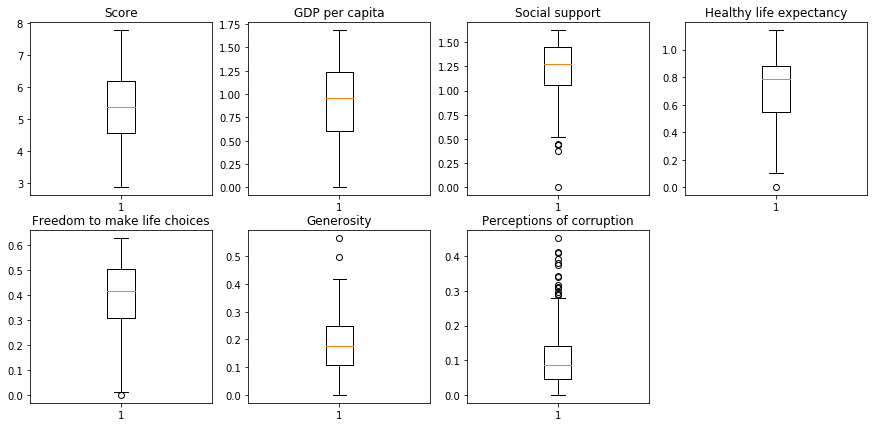

In [162]:
# Boxplot
plt.figure(figsize=(15,7))

plt.subplot(241)
plt.boxplot(df['Score'])
plt.title('Score')

plt.subplot(242)
plt.boxplot(df['GDP per capita'])
plt.title('GDP per capita')

plt.subplot(243)
plt.boxplot(df['Social support'])
plt.title('Social support')

plt.subplot(244)
plt.boxplot(df['Healthy life expectancy'])
plt.title('Healthy life expectancy')

plt.subplot(245)
plt.boxplot(df['Freedom to make life choices'])
plt.title('Freedom to make life choices')

plt.subplot(246)
plt.boxplot(df['Generosity'])
plt.title('Generosity')

plt.subplot(247)
plt.boxplot(df['Perceptions of corruption'])
plt.title('Perceptions of corruption')

plt.show()

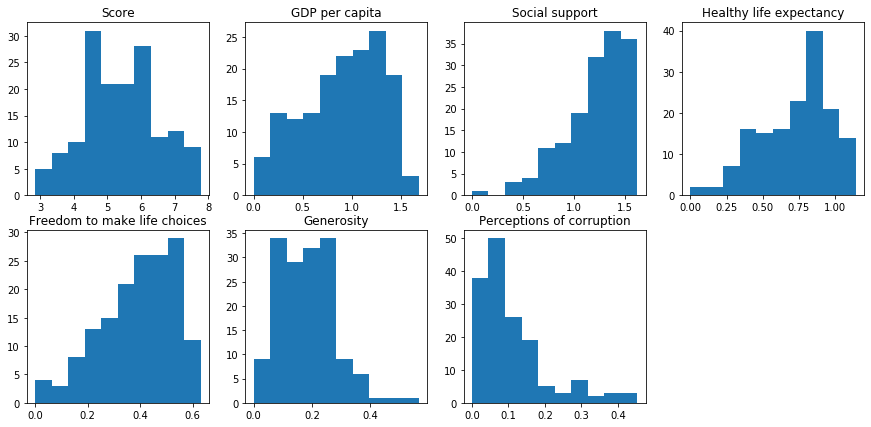

In [163]:
# Histogram
plt.figure(figsize=(15,7))

plt.subplot(241)
plt.hist(df['Score'])
plt.title('Score')

plt.subplot(242)
plt.hist(df['GDP per capita'])
plt.title('GDP per capita')

plt.subplot(243)
plt.hist(df['Social support'])
plt.title('Social support')

plt.subplot(244)
plt.hist(df['Healthy life expectancy'])
plt.title('Healthy life expectancy')

plt.subplot(245)
plt.hist(df['Freedom to make life choices'])
plt.title('Freedom to make life choices')

plt.subplot(246)
plt.hist(df['Generosity'])
plt.title('Generosity')

plt.subplot(247)
plt.hist(df['Perceptions of corruption'])
plt.title('Perceptions of corruption')

plt.show()

#### __4. Di antara semua numerik feature/column (kecuali column Overall Rank), feature/column mana saja yang sangat mempengaruhi happiness score suatu negara? Buktikan dengan menghitung nilai:__
- Covariance
- Pearson Correlation
- Spearman Correlation
- Kendall Correlation

In [164]:
# correlation calculation using covariance
df.cov()

# feature that influence happiness score the most based on covariance calculation is 'GDP per capita'

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,2041.000000,-49.739565,-14.433603,-10.373597,-8.613123,-3.538429,-0.206529,-1.503206
Score,-49.739565,1.239036,0.352052,0.258788,0.210189,0.090394,0.008040,0.040579
GDP per capita,-14.433603,0.352052,0.158714,0.089981,0.080588,0.021640,-0.003023,0.011258
Social support,-10.373597,0.258788,0.089981,0.089515,0.052086,0.019178,-0.001372,0.005145
Healthy life expectancy,-8.613123,0.210189,0.080588,0.052086,0.058624,0.013544,-0.000681,0.006759
Freedom to make life choices,-3.538429,0.090394,0.021640,0.019178,0.013544,0.020532,0.003682,0.005945
Generosity,-0.206529,0.008040,-0.003023,-0.001372,-0.000681,0.003682,0.009073,0.002941
Perceptions of corruption,-1.503206,0.040579,0.011258,0.005145,0.006759,0.005945,0.002941,0.008937


In [165]:
# correlation calculation using pearson method
df.corr(method='pearson')

# feature that influence happiness score the most based on pearson is 'GDP per capita'

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


In [166]:
# correlation calculation using spearman method
df.corr(method='spearman')

# feature that influence happiness score the most based on spearman is 'Social support'

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.999999,-0.814430,-0.816125,-0.807279,-0.552014,-0.070484,-0.217240
Score,-0.999999,1.000000,0.814483,0.816181,0.807275,0.551974,0.070483,0.217348
GDP per capita,-0.814430,0.814483,1.000000,0.768539,0.851513,0.393426,-0.041304,0.223203
Social support,-0.816125,0.816181,0.768539,1.000000,0.725997,0.449491,0.007695,0.114017
Healthy life expectancy,-0.807279,0.807275,0.851513,0.725997,1.000000,0.412906,-0.006773,0.165309
Freedom to make life choices,-0.552014,0.551974,0.393426,0.449491,0.412906,1.000000,0.324146,0.403586
Generosity,-0.070484,0.070483,-0.041304,0.007695,-0.006773,0.324146,1.000000,0.286171
Perceptions of corruption,-0.217240,0.217348,0.223203,0.114017,0.165309,0.403586,0.286171,1.000000


In [167]:
# correlation calculation using kendall method
df.corr(method='kendall')

# feature that influence happiness score the most based on kendall is 'GDP per capita'

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.999959,-0.619885,-0.616683,-0.602671,-0.394270,-0.043840,-0.140885
Score,-0.999959,1.000000,0.619993,0.616792,0.602613,0.394203,0.043759,0.140974
GDP per capita,-0.619885,0.619993,1.000000,0.569193,0.655693,0.270837,-0.042451,0.135225
Social support,-0.616683,0.616792,0.569193,1.000000,0.529983,0.319566,0.000746,0.070270
Healthy life expectancy,-0.602671,0.602613,0.655693,0.529983,1.000000,0.288418,-0.004901,0.106295
Freedom to make life choices,-0.394270,0.394203,0.270837,0.319566,0.288418,1.000000,0.226187,0.277792
Generosity,-0.043840,0.043759,-0.042451,0.000746,-0.004901,0.226187,1.000000,0.188933
Perceptions of corruption,-0.140885,0.140974,0.135225,0.070270,0.106295,0.277792,0.188933,1.000000


In [ ]:
# Conclusion:
# from this result, we can conclude that features that influence happines score of a country are (ranking order):
# 1. GDP per capita
# 2. Social support
# 3. Healthy life expectancy
# Reason: those 3 have the highest score near 1.

#### __5. Visualisasikan dalam bentuk bar chart data berikut:__
- 10 Negara dengan GDP per capita tertinggi.
- 10 Negara dengan Healthy life expectancy tertinggi.
- 10 Negara dengan Perceptions of corruption tertinggi.

In [168]:
# 10 Negara dengan GDP per capita tertinggi
df1 = df.sort_values(by='GDP per capita', ascending=False)
df1 = df1.head(10)
df1

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
28,29,Qatar,6.374,1.684,1.313,0.871,0.555,0.220,0.167
13,14,Luxembourg,7.090,1.609,1.479,1.012,0.526,0.194,0.316
33,34,Singapore,6.262,1.572,1.463,1.141,0.556,0.271,0.453
20,21,United Arab Emirates,6.825,1.503,1.310,0.825,0.598,0.262,0.182
50,51,Kuwait,6.021,1.500,1.319,0.808,0.493,0.142,0.097
15,16,Ireland,7.021,1.499,1.553,0.999,0.516,0.298,0.310
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
75,76,Hong Kong,5.430,1.438,1.277,1.122,0.440,0.258,0.287
18,19,United States,6.892,1.433,1.457,0.874,0.454,0.280,0.128


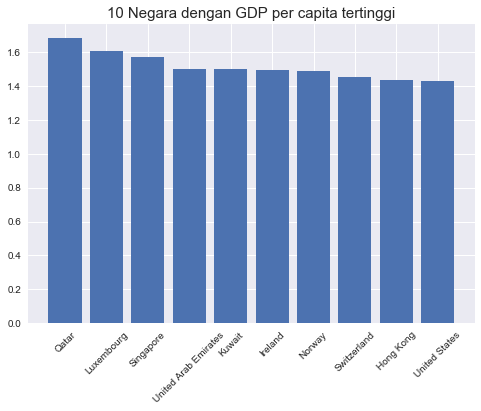

In [172]:
plt.style.use('seaborn')
plt.bar(df1['Country or region'], df1['GDP per capita'])
plt.title('10 Negara dengan GDP per capita tertinggi', size=15)
plt.xticks(rotation=45)
plt.show()

In [170]:
# 10 Negara dengan Healthy life expectancy tertinggi
df2 = df.sort_values(by='Healthy life expectancy', ascending=False)
df2 = df2.head(10)
df2

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
33,34,Singapore,6.262,1.572,1.463,1.141,0.556,0.271,0.453
75,76,Hong Kong,5.430,1.438,1.277,1.122,0.440,0.258,0.287
57,58,Japan,5.886,1.327,1.419,1.088,0.445,0.069,0.140
29,30,Spain,6.354,1.286,1.484,1.062,0.362,0.153,0.079
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
23,24,France,6.592,1.324,1.472,1.045,0.436,0.111,0.183
48,49,Cyprus,6.046,1.263,1.223,1.042,0.406,0.190,0.041
63,64,Northern Cyprus,5.718,1.263,1.252,1.042,0.417,0.191,0.162
35,36,Italy,6.223,1.294,1.488,1.039,0.231,0.158,0.030
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308


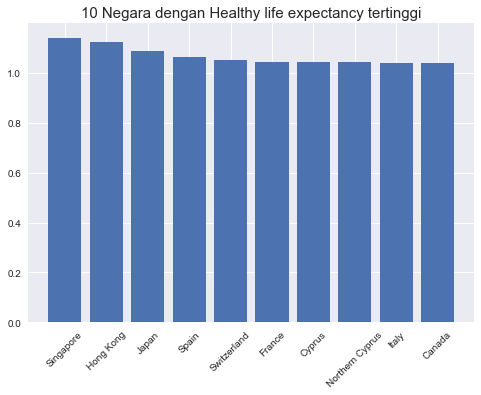

In [173]:
plt.style.use('seaborn')
plt.bar(df2['Country or region'], df2['Healthy life expectancy'])
plt.title('10 Negara dengan Healthy life expectancy tertinggi', size=15)
plt.xticks(rotation=45)
plt.show()

In [27]:
# 10 Negara dengan Perceptions of corruption tertinggi.
df3 = df.sort_values(by='Perceptions of corruption', ascending=False)
df3 = df3.head(10)
df3

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
33,34,Singapore,6.262,1.572,1.463,1.141,0.556,0.271,0.453
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
13,14,Luxembourg,7.090,1.609,1.479,1.012,0.526,0.194,0.316
15,16,Ireland,7.021,1.499,1.553,0.999,0.516,0.298,0.310


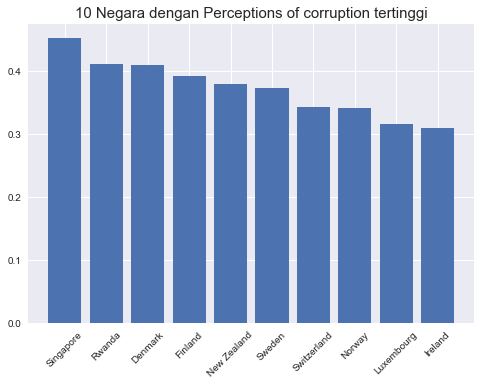

In [174]:
plt.style.use('seaborn')
plt.bar(df3['Country or region'], df3['Perceptions of corruption'])
plt.title('10 Negara dengan Perceptions of corruption tertinggi', size=15)
plt.xticks(rotation=45)
plt.show()